## About the dataset 
These files contain complete loan data for all loans issued in 2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information.
The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.
Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. 
The file is a matrix of about 420 thousand observations and 75 variables.
A data dictionary is provided in a separate file.

### Importing libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
#To plot figs on jupyter
%matplotlib inline

In [142]:
df_loan = pd.read_csv('loan.csv',parse_dates=['issue_d','earliest_cr_line','next_pymnt_d','last_pymnt_d'])
df_loan.info()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
id                             421094 non-null int64
member_id                      421094 non-null int64
loan_amnt                      421094 non-null int64
funded_amnt                    421094 non-null int64
funded_amnt_inv                421094 non-null int64
term                           421094 non-null object
int_rate                       421094 non-null float64
installment                    421094 non-null float64
grade                          421094 non-null object
sub_grade                      421094 non-null object
emp_title                      397220 non-null object
emp_length                     421094 non-null object
home_ownership                 421094 non-null object
annual_inc                     421094 non-null float64
verification_status            421094 non-null object
issue_d                        421094 non-null object
loan_status                

In [143]:
#Remvoing columns that have very high null values
print(df_loan.shape)
print(df_loan.isnull().sum())

(421094, 74)
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       23874
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           421049
purpose                             0
title                             132
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0

In [144]:
#Remvoing columns that have very high null values
#title and purpose are the same column so drop title, url is not important column drop that
#remove Nas from last_pymnt_d and last_credit_pull_d
#drop zip_code because its categorical column, doing OHE -> curse of Dimensionality
to_remove=['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog','mths_since_last_record','desc','emp_title','mths_since_last_delinq','next_pymnt_d','title','member_id','url','zip_code']
df = df_loan.drop(to_remove,axis=1)

In [145]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())

(421094, 47)
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')
id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0


In [146]:
df1 = df.dropna(how='any',axis=0) #It will erase every row (axis=0) that has "any" Null value in it.
df1.shape

(420921, 47)

In [147]:
df1.isnull().sum() #notice that on dropping NAs in tot_coll_amt also resulted in removing NAs of total_rev_hi_lim and tot_cur_bal

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [148]:
print(df1.application_type.value_counts())
print(df1.home_ownership.value_counts())
print(df1.purpose.value_counts())

INDIVIDUAL    420410
JOINT            511
Name: application_type, dtype: int64
MORTGAGE    207601
RENT        167579
OWN          45739
ANY              2
Name: home_ownership, dtype: int64
debt_consolidation    249940
credit_card           102006
home_improvement       25260
other                  19183
major_purchase          7444
medical                 3933
car                     3464
small_business          3362
moving                  2419
vacation                2244
house                   1437
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64


In [149]:
#we can see that most of the application types are Individual , so drop Joint application types
df1 = df1[df1.application_type != 'JOINT']

In [150]:
#now drop column application type since it only has individual 
df1.drop('application_type',axis=1,inplace=True)
#now drop ANY level of ownership type since it has only 2 values
df1 = df1[df1.home_ownership != 'ANY']

In [151]:
print(df1.home_ownership.value_counts())
print(df1.purpose.value_counts())

MORTGAGE    207247
RENT        167457
OWN          45704
Name: home_ownership, dtype: int64
debt_consolidation    249605
credit_card           101891
home_improvement       25234
other                  19155
major_purchase          7442
medical                 3931
car                     3463
small_business          3360
moving                  2418
vacation                2243
house                   1437
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64


In [152]:
dictr = {'educational':'other',
        'renewable_energy':'other',
        'wedding':'other',
         'house':'other',
         'vacation':'other',
         'moving':'other'
        }

In [153]:
#We can delete the levels which have less values and combine them with other. This will result in less columns being generated
#in OHE
df1.purpose = df1.purpose.replace(dictr)

In [154]:
print(df1.home_ownership.value_counts())
print(df1.purpose.value_counts())

MORTGAGE    207247
RENT        167457
OWN          45704
Name: home_ownership, dtype: int64
debt_consolidation    249605
credit_card           101891
other                  25482
home_improvement       25234
major_purchase          7442
medical                 3931
car                     3463
small_business          3360
Name: purpose, dtype: int64


In [155]:
print(df1.policy_code.value_counts())
print(df1.initial_list_status.value_counts())
print(df1.pymnt_plan.value_counts())

1    420408
Name: policy_code, dtype: int64
w    266793
f    153615
Name: initial_list_status, dtype: int64
n    420407
y         1
Name: pymnt_plan, dtype: int64


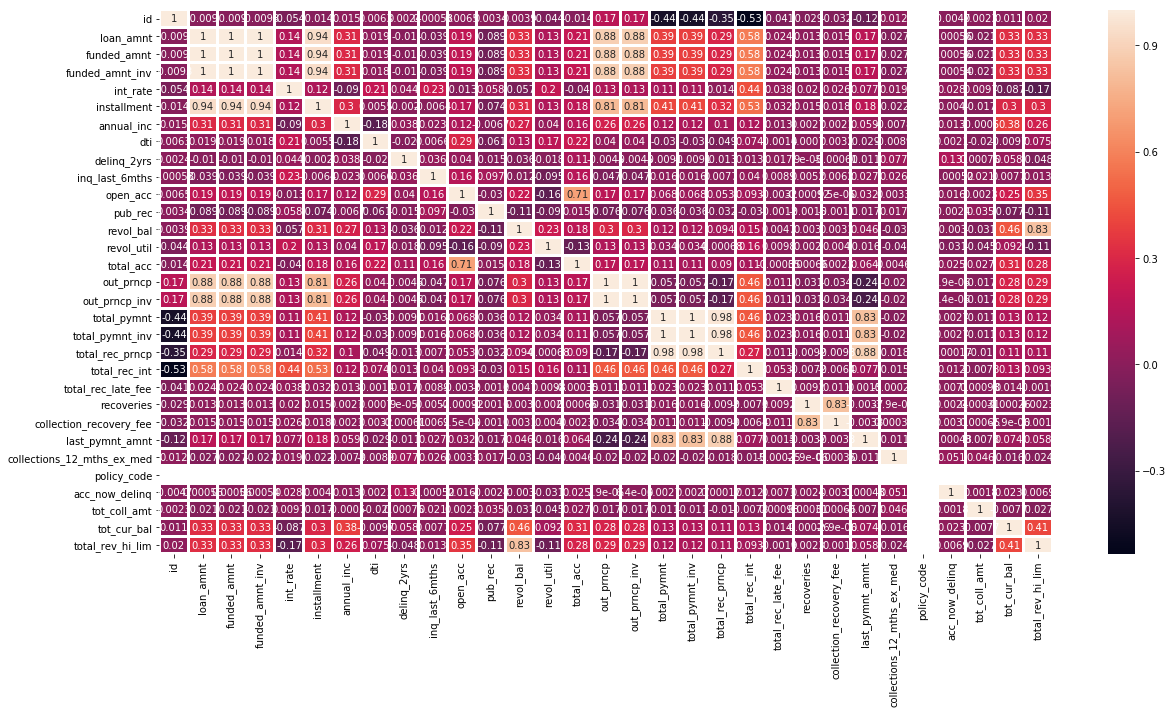

In [156]:
# Correlation between columns
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [157]:
#Removing co-related columns and policy_code
#remove earliest_cr_line as it has too many levels and its not important as per description
df1.drop(['total_acc','total_rec_int','tot_cur_bal','policy_code','funded_amnt', 'funded_amnt_inv','installment','earliest_cr_line','pymnt_plan','collection_recovery_fee','out_prncp','total_pymnt_inv','total_rec_prncp','out_prncp_inv','last_pymnt_amnt','total_rev_hi_lim'],axis=1,inplace=True)

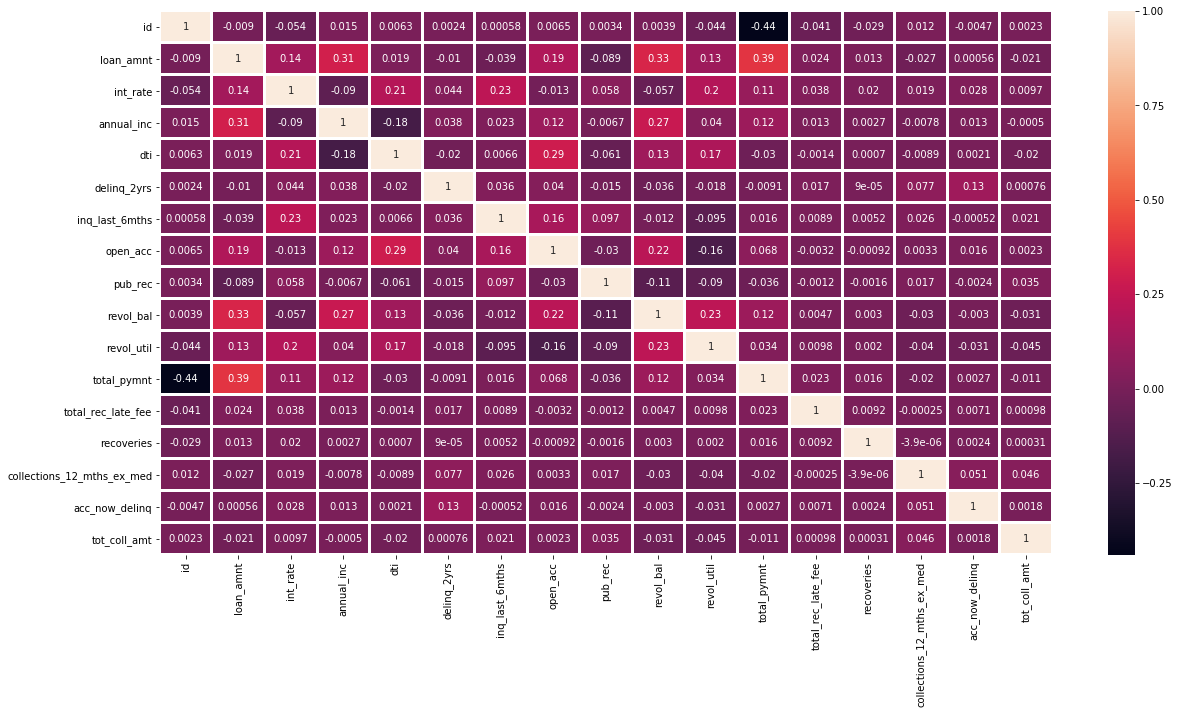

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [159]:
df1.describe()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt
count,4.204080e+05,420408.000000,420408.000000,4.204080e+05,420408.000000,420408.000000,420408.000000,420408.000000,420408.000000,4.204080e+05,420408.000000,420408.000000,420408.000000,420408.000000,420408.000000,420408.000000,420408.000000
mean,5.391664e+07,15235.908213,12.597613,7.697905e+04,19.133300,0.347165,0.572763,11.952261,0.233768,1.769063e+04,53.829234,3152.740998,0.116086,2.266957,0.020245,0.006089,257.553772
std,9.471983e+06,8568.862007,4.316760,7.397686e+04,8.657226,0.927272,0.867895,5.632477,0.649904,2.419396e+04,23.886040,4233.389447,2.089227,111.519277,0.157500,0.086511,2241.954349
min,5.670500e+04,1000.000000,5.320000,3.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.611759e+07,8500.000000,9.170000,4.612800e+04,12.590000,0.000000,0.000000,8.000000,0.000000,6.484000e+03,36.000000,857.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.534166e+07,14000.000000,12.290000,6.500000e+04,18.590000,0.000000,0.000000,11.000000,0.000000,1.200000e+04,54.100000,1973.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.181241e+07,20000.000000,15.590000,9.180000e+04,25.330000,0.000000,1.000000,15.000000,0.000000,2.143100e+04,72.100000,3806.260000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.861706e+07,35000.000000,28.990000,9.500000e+06,39.990000,39.000000,6.000000,90.000000,86.000000,2.904836e+06,193.000000,42786.530000,169.050000,26308.470000,14.000000,14.000000,496651.000000


In [50]:
print(df1.emp_length.value_counts()) 

10+ years    141294
2 years       37441
< 1 year      34281
3 years       33386
1 year        27430
5 years       24903
4 years       24469
n/a           23753
8 years       21521
7 years       18386
6 years       16809
9 years       16735
Name: emp_length, dtype: int64


#To be used during logistic regression - Model building

import re
import datetime
print(datetime.datetime.now())
cnt=0
for index,row in df1.iterrows():
    cnt=cnt+1
    if df1.loc[index,'emp_length'] != 'n/a':
    #if re.search('\d{1,3}',str(df1.loc[index,'emp_length'])) != None:
        df1.loc[index,'emp_length'] = re.findall('\d+',str(df1.loc[index,'emp_length']))[0]
        #df1.loc[index,'emp_length'] = df1.loc[index,'emp_length'].str.extract('(\d+)').astype(int)
    if cnt%10000 == 0:
        print("Processed {0}, time {1}".format(cnt,datetime.datetime.now()))
        
print("Ended {0}".format(datetime.datetime.now()))

### Using KNN for missing emp_length Imputation

In [46]:
numerical_columns1 = ['loan_amnt','int_rate','emp_length','annual_inc','dti', 'delinq_2yrs','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc','total_pymnt', 'total_rec_int','total_rec_late_fee', 'recoveries','collections_12_mths_ex_med','acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']
dataset = df1.loc[:,numerical_columns1]

In [47]:
#Imputing NA's of emp_length
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn import metrics as sm

test_df = dataset[dataset.emp_length == 'n/a']
dataset = dataset[dataset.emp_length != 'n/a']
train = dataset.loc[:,~dataset.columns.isin(['emp_length'])]
test = dataset.loc[:,'emp_length']

In [48]:
test_df.drop('emp_length',axis=1,inplace=True) #dropping this column as we will be imputing this

In [49]:
print("Start of training KNN {0}".format(datetime.datetime.now()))
train_sc = scale(train)
print("End of training KNN {0}".format(datetime.datetime.now()))
#splitting data into training and test set
x_train,x_test,y_train,y_test = train_test_split(train_sc,test,test_size=0.3,random_state=25)
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier().fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
knn

Start of training KNN 2019-02-18 17:35:18.909780
End of training KNN 2019-02-18 17:35:19.366354
Start of Fitting KNN  2019-02-18 17:35:19.815487
End of Fitting KNN  2019-02-18 17:45:06.968409


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of prediction KNN  2019-02-18 18:00:00.647019
End of prediction KNN  2019-02-18 18:38:36.337674


0.28108271637100096

In [51]:
print(sm.classification_report(y_test,prediction))

             precision    recall  f1-score   support

          1       0.18      0.30      0.22     18519
         10       0.39      0.61      0.48     42600
          2       0.11      0.06      0.08     11154
          3       0.09      0.04      0.06      9877
          4       0.07      0.02      0.03      7372
          5       0.06      0.02      0.03      7547
          6       0.04      0.01      0.01      4998
          7       0.05      0.01      0.02      5566
          8       0.06      0.02      0.03      6453
          9       0.04      0.01      0.01      4911

avg / total       0.20      0.28      0.23    118997



In [143]:
dataset.drop(['total_acc','total_rec_int','tot_cur_bal'],axis=1,inplace=True)
train = dataset.loc[:,~dataset.columns.isin(['emp_length'])]
test = dataset.loc[:,'emp_length']
print("Start of scaling KNN {0}".format(datetime.datetime.now()))
train_sc = scale(train)
print("End of scaling KNN {0}".format(datetime.datetime.now()))
#splitting data into training and test set
x_train,x_test,y_train,y_test = train_test_split(train_sc,test,test_size=0.3,random_state=25)

Start of scaling KNN 2019-02-19 11:33:13.680356
End of scaling KNN 2019-02-19 11:33:14.017755


In [142]:
dataset.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')

In [144]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=11).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of Fitting KNN  2019-02-19 11:33:37.651253
End of Fitting KNN  2019-02-19 11:45:32.841666
Start of prediction KNN  2019-02-19 11:45:32.841666
End of prediction KNN  2019-02-19 12:24:38.188589


0.30874727934317669

In [145]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=25).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of Fitting KNN  2019-02-19 12:55:43.482652
End of Fitting KNN  2019-02-19 13:05:15.205882
Start of prediction KNN  2019-02-19 13:05:15.205882
End of prediction KNN  2019-02-19 14:31:31.688765


0.34698353740010252

In [149]:
print("Start of Fitting KNN  {0}".format(datetime.datetime.now()))
knn = KNeighborsClassifier(weights='distance',n_neighbors=71).fit(x_train,y_train)
print("End of Fitting KNN  {0}".format(datetime.datetime.now()))
print("Start of prediction KNN  {0}".format(datetime.datetime.now()))
prediction = knn.predict(x_test)
print("End of prediction KNN  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,prediction)

Start of Fitting KNN  2019-02-19 16:40:25.915796
End of Fitting KNN  2019-02-19 17:12:00.869061
Start of prediction KNN  2019-02-19 17:12:00.871526
End of prediction KNN  2019-02-19 18:56:25.312368


0.3620259334268931

### We can see KNN performed really bad.
It is a very time consuming process and it can be critical in data mining where large databases are being extracted.
In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. 
KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance.

### Using Decision Trees for imputing emp_length

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
print("Start of fitting DT  {0}".format(datetime.datetime.now()))
dt = DecisionTreeClassifier().fit(x_train,y_train)
print("End of fitting DT {0}".format(datetime.datetime.now()))
print("Start of prediction DT  {0}".format(datetime.datetime.now()))
pred = dt.predict(x_test)
print("End of prediction DT  {0}".format(datetime.datetime.now()))
sm.accuracy_score(y_test,pred)

Start of fitting DT  2019-02-19 19:49:27.983646
End of fitting DT 2019-02-19 19:49:39.497646
Start of prediction DT  2019-02-19 19:49:39.497646
End of prediction DT  2019-02-19 19:49:39.727457


0.1938956444280108

In [ ]:
dot_data = StringIO()
tree.export_graphviz(dt, out_file=dot_data, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")

In [ ]:
### IGNORE
test_df_scale = scale(test_df)
pred = knn.predict(test_df_scale)
test_df['emp_length'] = pred
test_df.head()
#drop rows where emp_length = 'n/a'
df2 = df2[df2.emp_length != 'n/a']
#combine the two dataframes-df2 and imputed emp_length from KNN algorithm
df22 = df2[df2.emp_length == 'n/a']
df22.drop('emp_length',axis=1,inplace=True)
pd.concat([df22,test_df['emp_length']],axis=1)
pd.concat([df2,df22],axis=0)
df2.emp_length.value_counts()

from fancyimpute import MICE
#fancy impute removes column names.
pd.concat([dataset,test_df],axis=0)
train_cols = list(dataset)
# Use MICE to fill in each row's missing features
train = pd.DataFrame(MICE(verbose=False).complete(dataset))
train.columns = train_cols

In [160]:
df2 = df1.copy()

## Checking for Outliers

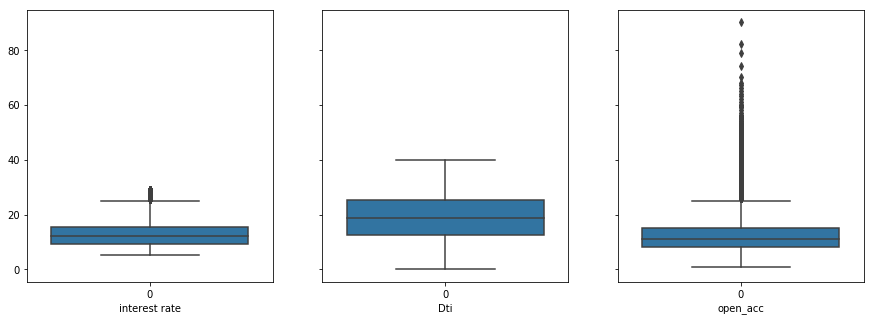

In [56]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df2.int_rate,ax=ax1)
g2.set_xlabel("interest rate")
g4 = sns.boxplot(data=df2.dti,ax=ax2)
g4.set_xlabel("Dti")
g7 = sns.boxplot(data=df2.open_acc,ax=ax3)
g7.set_xlabel("open_acc")

plt.show()

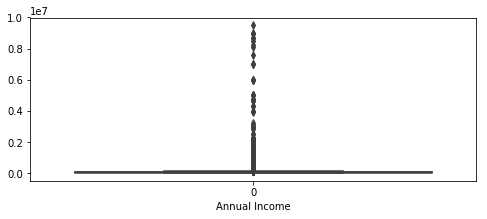

In [57]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g3 = sns.boxplot(data=df2.annual_inc,ax=ax1)
g3.set_xlabel("Annual Income")
plt.show()

Text(0.5, 0, 'loan amount')

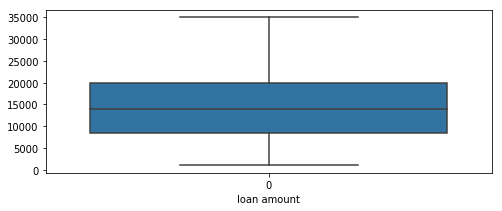

In [58]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g1 = sns.boxplot(data=df2.loan_amnt,ax=ax1)
g1.set_xlabel("loan amount")

Text(0.5, 0, 'delinq_2yrs')

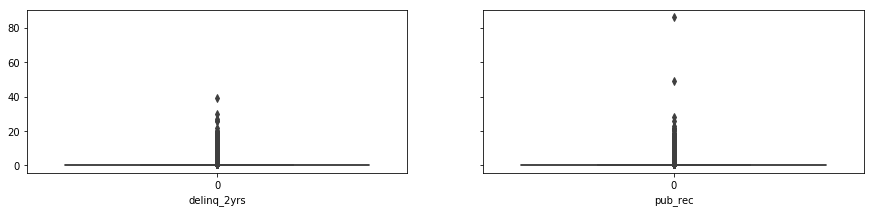

In [59]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2.pub_rec,ax=ax2)
g8.set_xlabel("pub_rec")
g5 = sns.boxplot(data=df2.delinq_2yrs,ax=ax1)
g5.set_xlabel("delinq_2yrs")

Text(0.5, 0, 'Revol Bal')

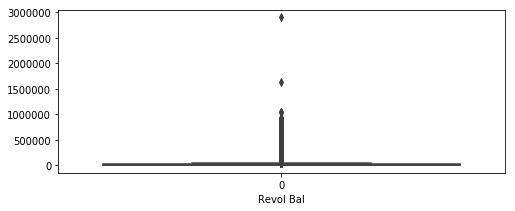

In [60]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2.revol_bal,ax=ax1)
g8.set_xlabel("Revol Bal")

Text(0.5, 0, 'Revol Util')

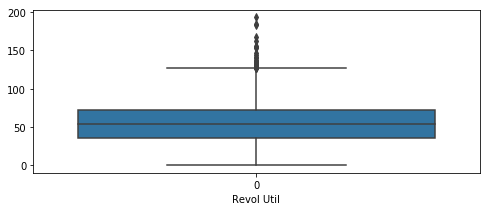

In [61]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.revol_util,ax=ax1)
g5.set_xlabel("Revol Util")

Text(0.5, 0, 'Total Payment')

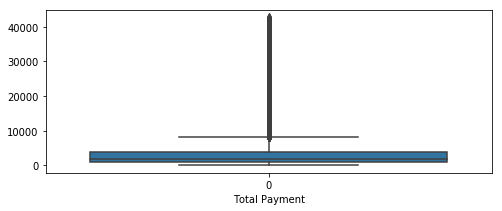

In [62]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.total_pymnt,ax=ax1)
g5.set_xlabel("Total Payment")

Text(0.5, 0, 'Total Recd Late fee')

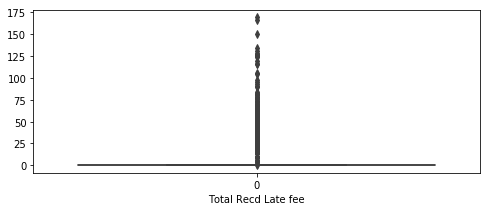

In [63]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.total_rec_late_fee,ax=ax1)
g5.set_xlabel("Total Recd Late fee")

Text(0.5, 0, 'Recoveries')

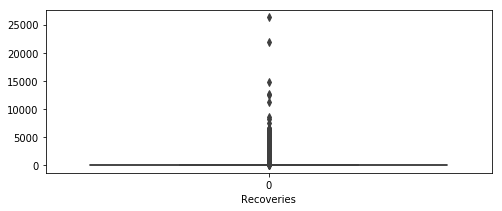

In [64]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.recoveries,ax=ax1)
g5.set_xlabel("Recoveries")

Text(0.5, 0, 'acc_now_delinq')

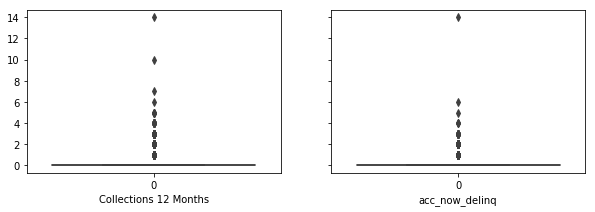

In [65]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.collections_12_mths_ex_med,ax=ax1)
g5.set_xlabel("Collections 12 Months")
g6 = sns.boxplot(data=df2.acc_now_delinq,ax=ax2)
g6.set_xlabel("acc_now_delinq")

Text(0.5, 0, 'tot_coll_amt')

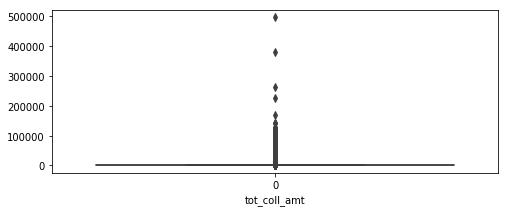

In [66]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2.tot_coll_amt,ax=ax1)
g5.set_xlabel("tot_coll_amt")

## Outliers Detection

In [111]:
#Calculating percentage of outliers
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR.keys())
IQR.values

Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')


array([  1.56948158e+07,   1.15000000e+04,   6.42000000e+00,
         4.56720000e+04,   1.27400000e+01,   0.00000000e+00,
         1.00000000e+00,   7.00000000e+00,   0.00000000e+00,
         1.49470000e+04,   3.61000000e+01,   2.94906000e+03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [112]:
df_outlier_pct = pd.DataFrame(columns=['Colname','Pct'],data=None)

In [113]:
#Calculating percentage of Outliers in each Column
loc = 0
for col in IQR.keys():
    outlier_cnt = ((df2[col] < (Q1[col] - 1.5 * IQR[col])) | (df2[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    #print("{0}\t\t\t- {1} ".format(col,outlier_cnt/len(df2[col])))
    df_outlier_pct.loc[loc,'Colname'] = col
    df_outlier_pct.loc[loc,'Pct'] = outlier_cnt/len(df2[col])
    loc+=1

In [114]:
print("Outlier Percentage in the Dataset")
df_outlier_pct
#We can see columns like delinq_2yrs, tot_coll_amt and pub_rec have more than 5% of outliers 
#hence we cannot delete outliers from these columns- we will cap them

#for others we can delete the rows containing the outliers since percentage is less than 5%

Outlier Percentage in the Dataset


,Colname,Pct
0,id,0.00222403
1,loan_amnt,0
2,int_rate,0.00768539
3,annual_inc,0.0451014
4,dti,0
5,delinq_2yrs,0.20673
6,inq_last_6mths,0.040513
7,open_acc,0.0257797
8,pub_rec,0.176702
9,revol_bal,0.0598252


In [115]:
#Remove ID since we dont want to remove rows of id column- ID is just a serial number column
df_outlier_pct.drop(df_outlier_pct.head(1).index, inplace=True)

In [116]:
df_outlier_pct

,Colname,Pct
1,loan_amnt,0
2,int_rate,0.00768539
3,annual_inc,0.0451014
4,dti,0
5,delinq_2yrs,0.20673
6,inq_last_6mths,0.040513
7,open_acc,0.0257797
8,pub_rec,0.176702
9,revol_bal,0.0598252
10,revol_util,8.56311e-05


In [161]:
df2_out = df2.copy()

In [119]:
print(df2_out.collections_12_mths_ex_med.value_counts())
print(df2_out.tot_coll_amt.value_counts())
print(df2_out.acc_now_delinq.value_counts())
print(df2_out.total_pymnt.value_counts())
print(df2_out.total_rec_late_fee.value_counts())
print(df2_out.pub_rec.value_counts())
print(df2_out.open_acc.value_counts())
print(df2_out.inq_last_6mths.value_counts())
print(df2_out.delinq_2yrs.value_counts())

0     412650
1       7153
2        510
3         69
4         16
5          6
14         1
10         1
7          1
6          1
Name: collections_12_mths_ex_med, dtype: int64
0        354118
50          916
100         707
75          527
200         404
150         402
60          382
70          335
80          326
250         273
65          270
55          260
90          254
85          235
125         217
95          209
300         205
66          204
67          202
99          201
61          198
51          197
56          197
78          195
64          193
79          192
63          192
96          189
71          186
74          184
          ...  
21374         1
11377         1
8567          1
5859          1
7906          1
3445          1
5494          1
32379         1
3808          1
6006          1
12260         1
6263          1
4214          1
45044         1
24959         1
6768          1
10870         1
7024          1
6625          1
15220         1
17275  

In [162]:
df2_out.recoveries.value_counts()

0.00       420102
1053.50         2
1000.00         2
2359.18         1
2345.40         1
2296.66         1
2287.99         1
2284.36         1
2273.28         1
2098.90         1
2245.76         1
2243.86         1
2235.04         1
2367.75         1
2228.69         1
2176.12         1
2134.77         1
2103.98         1
2262.61         1
2081.86         1
2448.46         1
1931.82         1
1807.09         1
1817.30         1
1819.35         1
1832.63         1
1844.09         1
1860.50         1
1889.82         1
1939.32         1
            ...  
4683.56         1
4742.91         1
4836.81         1
4850.28         1
4877.96         1
4894.68         1
4934.60         1
4958.04         1
4988.30         1
5008.00         1
4527.17         1
4433.99         1
4128.70         1
4423.25         1
4180.91         1
4185.14         1
4199.27         1
4218.83         1
4236.70         1
4280.05         1
4293.08         1
4309.18         1
4329.46         1
4330.99         1
4339.99   

#### Inference 
We can see that columns like collections_12_mths_ex_med,tot_coll_amt,acc_now_delinq,total_pymnt,total_rec_late_fee,recoveries 
have most of the values 0. So deleting these columns wont make an impact as such. We will delete these columns


In [163]:
### Deleting the columns
df2_out.drop(['collections_12_mths_ex_med','tot_coll_amt','acc_now_delinq','total_pymnt','total_rec_late_fee','recoveries'],axis=1,inplace=True)

In [122]:
print(df2_out.pub_rec.value_counts())
print(df2_out.open_acc.value_counts())
print(df2_out.inq_last_6mths.value_counts())
print(df2_out.delinq_2yrs.value_counts())

0     346121
1      60114
2       9209
3       2873
4       1041
5        481
6        249
7        108
8         84
9         34
10        29
11        15
12        14
13        10
15         5
16         4
18         3
21         3
17         2
49         1
14         1
19         1
20         1
22         1
23         1
26         1
28         1
86         1
Name: pub_rec, dtype: int64
9     36212
10    35759
8     34620
11    33111
7     30227
12    30070
13    26803
6     25065
14    23051
15    19531
5     18166
16    16484
17    13856
18    11449
4     10747
19     9620
20     7801
21     6314
22     5205
23     4166
3      4086
24     3417
25     2764
26     2087
27     1757
28     1354
29     1125
2       966
30      844
31      689
      ...  
44       34
46       32
45       30
48       26
47       24
49       15
51       12
52       11
53       11
50        9
55        6
56        6
54        3
59        2
60        2
74        1
68        1
70        1
82        1
79      

#### Inference
-Not removing outliers from inq_last_6mths (has values from 0-6 and it makes sense to have them)
-Not removing outliers from delinq_2yrs (has values from 0-39), we can however update row with delinq_2yrs = 39,30 with 27.
 Not deleting rows since this is an important column in finding a default customer and we dont want to lose this imp. data
 Note only 2 rows will be updated
-We will update open_acc values with greater than 50 = 50 since there are only 24 values with greater than 50 
-We will udpate pub_rec =86 with 28 since others are in the range 0-28. 

In [184]:
df2_out.delinq_2yrs[df2_out.delinq_2yrs >29] = 27

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [186]:
df2_out.open_acc[df2_out.open_acc >50] = 50
df2_out.pub_rec[df2_out.pub_rec > 28] = 28

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Capping Outliers of annual_income, int_rate, revol_util and revol_bal

In [174]:
#capping outliers
out_cols = ['int_rate','annual_inc','revol_bal','revol_util']
for col in out_cols:
    percentiles = df2_out[col].quantile([0.05,0.95]).values
    df2_out[col][df2_out[col] <= percentiles[0]] = percentiles[0]
    df2_out[col][df2_out[col] >= percentiles[1]] = percentiles[1]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
## IGNORE

percentiles = df2_out['annual_inc'].quantile([0.05,0.95]).values
percentiles
#df2_out['annual_inc'][df2_out['annual_inc'] <= percentiles[0]]=percentiles[0]
#df2_out['annual_inc'][df2_out['annual_inc'] <= percentiles[0]]
#df2_out['annual_inc'][df2_out['annual_inc'] >= percentiles[1]] = percentiles[1]
df2_out['annual_inc'][df2_out['annual_inc'] > percentiles[1]].count()

Q1 = df2_out.quantile(0.25)
Q3 = df2_out.quantile(0.75)
IQR = Q3 - Q1
((df2_out['annual_inc'] < (Q1['annual_inc'] - 1.5 * IQR['annual_inc'])) | (df2_out['annual_inc'] > (Q3['annual_inc'] + 1.5 * IQR['annual_inc']))).sum()

Text(0.5, 0, 'Revol Util')

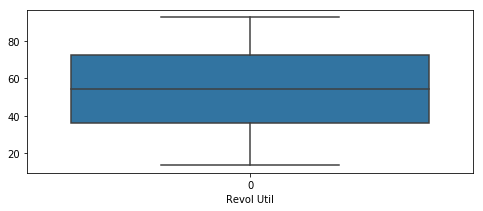

In [175]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g5 = sns.boxplot(data=df2_out.revol_util,ax=ax1)
g5.set_xlabel("Revol Util")

Text(0.5, 0, 'Revol Bal')

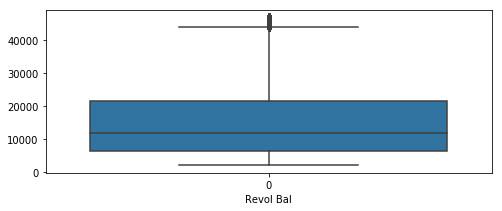

In [173]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2_out.revol_bal,ax=ax1)
g8.set_xlabel("Revol Bal")

Text(0.5, 0, 'delinq_2yrs')

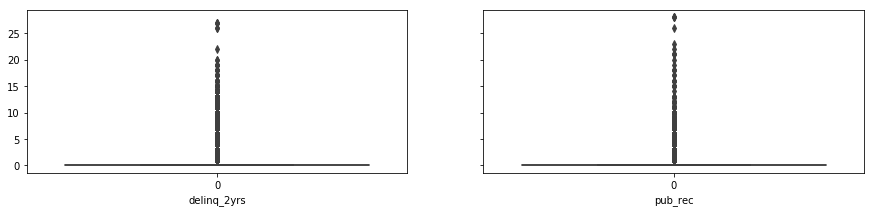

In [187]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3),sharex=True, sharey=True)
g8 = sns.boxplot(data=df2_out.pub_rec,ax=ax2)
g8.set_xlabel("pub_rec")
g5 = sns.boxplot(data=df2_out.delinq_2yrs,ax=ax1)
g5.set_xlabel("delinq_2yrs")

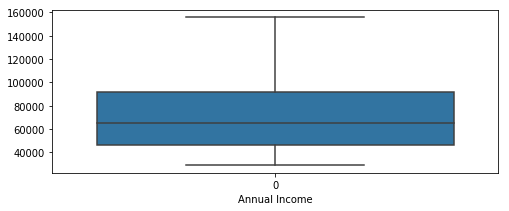

In [178]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g3 = sns.boxplot(data=df2_out.annual_inc,ax=ax1)
g3.set_xlabel("Annual Income")
plt.show()

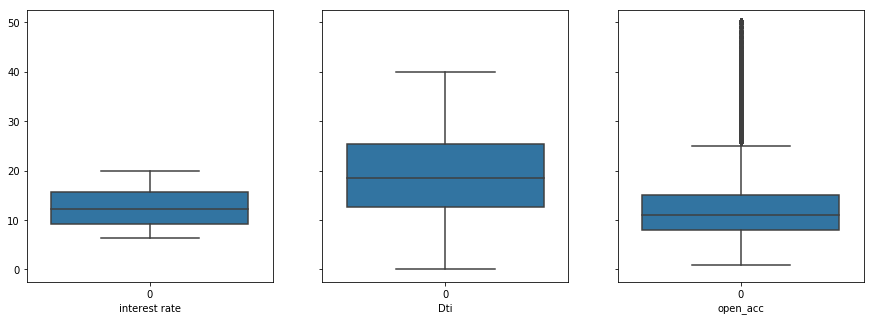

In [188]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df2_out.int_rate,ax=ax1)
g2.set_xlabel("interest rate")
g4 = sns.boxplot(data=df2_out.dti,ax=ax2)
g4.set_xlabel("Dti")
g7 = sns.boxplot(data=df2_out.open_acc,ax=ax3)
g7.set_xlabel("open_acc")

plt.show()

Text(0.5, 0, 'loan amount')

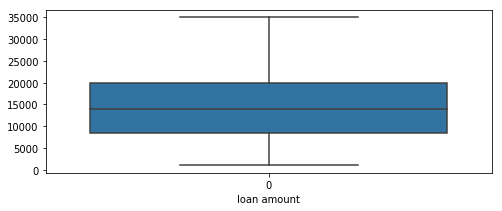

In [180]:
fig,ax1 = plt.subplots(1,1,figsize=(8,3),sharex=True, sharey=True)
g1 = sns.boxplot(data=df2.loan_amnt,ax=ax1)
g1.set_xlabel("loan amount")

In [189]:
df2_out.to_csv('df2_out.csv',index=False)

In [231]:
# creating a new column default
dict_default_mapping = {'In Grace Period':'Yes',
                       'Late (16-30 days)':'Yes',
                       'Late (31-120 days)':'Yes',
                       'Charged Off':'Yes',
                        'Default':'Yes',
                       'Issued':'No',
                       'Current':'No',
                       'Fully Paid':'No'}



df2_out['default'] = df2_out['loan_status'].replace(dict_default_mapping)
df2_out.columns
df2_out['default'] = df2_out['default'].astype('category')
df2_out['default'].value_counts()

No     408323
Yes     12085
Name: default, dtype: int64

## Exploratory Data Analysis

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


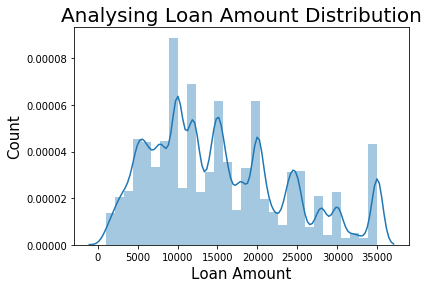

In [190]:
#distribution of loan amount
g = sns.distplot(df2_out['loan_amnt'],bins=30)
g.set_xlabel("Loan Amount", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Analysing Loan Amount Distribution", fontsize=20)
g

#### Inference
We can see there are peaks at series of 5000 and that makes sense since we normally apply for loan in factors of 5000

In [303]:
#Looking the count of defaults though the issue_d that is The month which the loan was funded
#df2['issue_month'], df2['issue_year'] = df2['issue_d'].str.split('-', 1).str

#plt.figure(figsize = (14,6))
#g = sns.countplot(x='issue_year', data=df2,hue='loan_status')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
#plt.show()

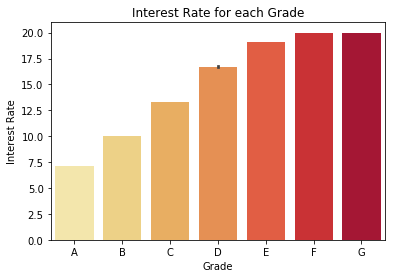

In [301]:
#sns.boxplot(x='grade',y='int_rate',data=df4,width=1.5)
#sns.barplot(x='grade',y='int_rate',data=df2_out)

pairs = zip(df2_out['grade'], df2_out['int_rate']) # zip with features_list
pairs= sorted(pairs,reverse= False)
newx, newy = zip(*pairs)
g = sns.barplot(x=newx, y=newy,palette='YlOrRd') #hu,Set1,coolwarm,OrRd,dark - palette options
g.set_xlabel("Grade") 
g.set_ylabel("Interest Rate")
g.set_title("Interest Rate for each Grade")

#### Inference
We can see that as grade increases, interest rate increases.

In [298]:
#sns.countplot(x='grade',hue='default',data=df2_out)
cm = sns.light_palette("orange",as_cmap=True)
pd.crosstab(df2_out['default'], df_loan['grade'],normalize='index').style.background_gradient(cmap = cm)


#### Inference
We can see that as the grade increases the chances of being a default increases.

Text(0.5, 1.0, 'Distribution of default by Purpose')

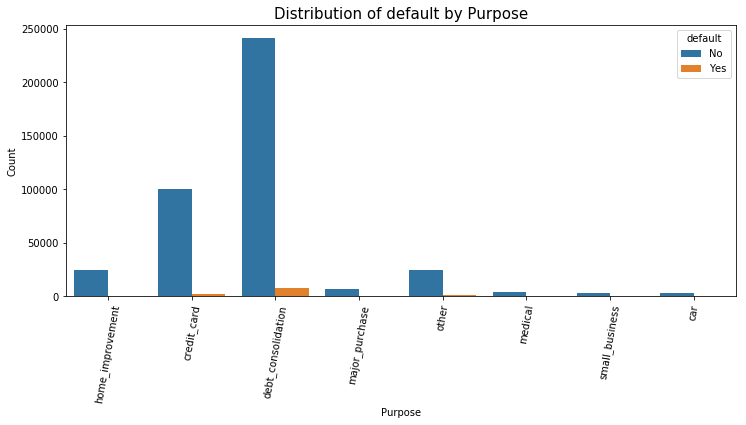

In [284]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
#g = sns.barplot(x=df2_out.purpose.value_counts().index,y=df2_out.purpose.value_counts(),data=df2_out,ax=ax,hue='default')
g = sns.countplot('purpose',data=df2_out,hue='default')
g.set_xticklabels(g.get_xticklabels(),rotation=80)
g.set_xlabel("Purpose")
g.set_ylabel("Count")
g.set_title("Distribution of default by Purpose",fontsize=15)

#### Inference
We can see that most of the defaulters are belonging to debt_consolidadtion category.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[]

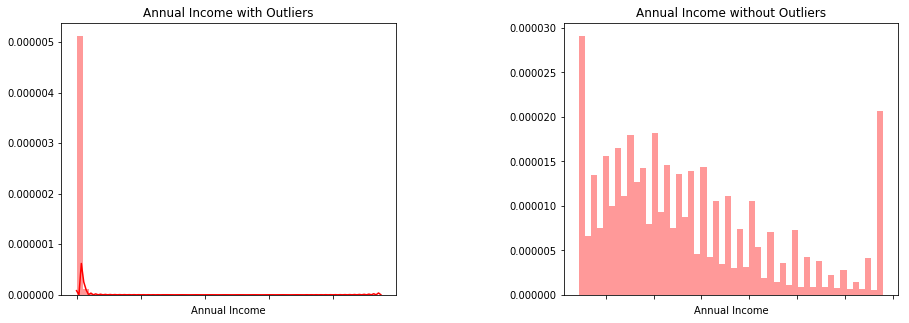

In [257]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
g1 = sns.distplot(df2['annual_inc'],ax=ax1,color='red')
g1.set_xlabel('Annual Income')
g1.set_title('Annual Income with Outliers')
g1.set_xticklabels("")
g2 = sns.distplot(df2_out['annual_inc'],ax=ax2,norm_hist=True,kde=False,color='red')
g2.set_xlabel('Annual Income')
g2.set_title('Annual Income without Outliers')
g2.set_xticklabels("")

In [ ]:
sns.countplot(x='purpose',data=df4,hue='default')
seaborn.countplot(data=df, x='reputation', order=df.reputation.value_counts().index)

### Loan status description
Fully Paid: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
Current: Loan is up to date on all outstanding payments.
Does not meet the credit policy. Status:Fully Paid: No explanation but see “fully paid”.
Issued: New loan that has passed all Lending Club reviews, received full funding, and has been issued.
Charged Off: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. Learn more about the difference between “default” and “charge off”.
Does not meet the credit policy. Status:Charged Off: No explanation but see “Charged Off”
Late (31-120 days): Loan has not been current for 31 to 120 days.
In Grace Period: Loan is past due but within the 15-day grace period.
Late (16-30 days): Loan has not been current for 16 to 30 days.
Default: Loan has not been current for 121 days or more.

Text(0.5, 1.0, 'Loan Status Count')

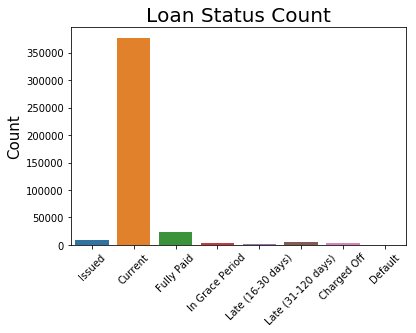

In [302]:
g = sns.countplot(x="loan_status", data=df2_out)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

#### Inference We can see that the number of default loans are very less.
This dataset is skewed and hence sampling techiques need to be applied

Text(0.5, 1.0, 'Employeement length Count')

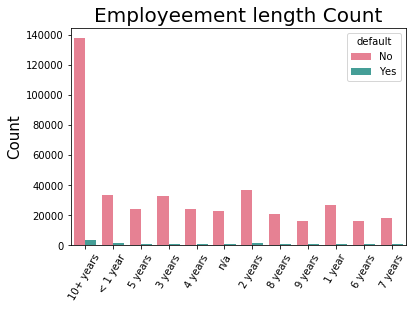

In [317]:
g = sns.countplot(x="emp_length", data=df2_out,palette='husl',hue='default')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Employeement length Count", fontsize=20)

Text(0.5, 1.0, 'Default')

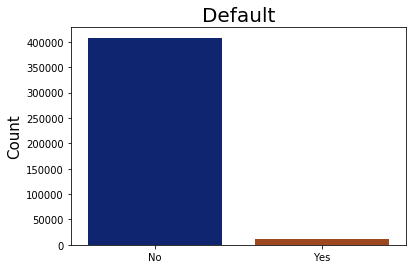

In [120]:
import seaborn as sns
%matplotlib inline
g = sns.countplot(x="default",data=df2_out,palette='dark')
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title('Default',fontsize=20)

In [121]:
df2_out.groupby('default').mean()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util
default,,,,,,,,,,,
No,5.410080e+07,15227.011582,12.409565,73242.433452,19.087685,0.344543,0.566500,11.957874,0.233212,15796.754011,53.848517
Yes,4.769437e+07,15536.503930,15.253050,69046.831698,20.674533,0.434506,0.784361,11.724617,0.246007,14332.201324,56.856268


The average int_rate of customers who were default is more than that of who were not default
The average annual income of customers who were default is lower than that who were not default
The average number of inquires for default customers is comparitively more than that of non default
The average revolving utilization of defaulters is more compared to non defaulters 


In [122]:
df2_out.groupby('emp_length').mean()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util
emp_length,,,,,,,,,,,
1 year,5.402112e+07,14343.690303,12.574295,69480.863720,18.658418,0.359898,0.572840,11.784725,0.194276,14128.853008,53.639913
10+ years,5.394736e+07,16445.252629,12.399011,79234.186559,19.374253,0.391715,0.570767,12.312844,0.241709,18025.751794,55.067057
2 years,5.379600e+07,14603.644401,12.520082,71072.659176,18.646819,0.367191,0.571432,11.825646,0.203814,14185.096445,53.086702
3 years,5.389829e+07,14710.911011,12.503719,71360.139009,18.733059,0.323489,0.581711,11.850027,0.214701,14348.489097,53.272773
4 years,5.384299e+07,14893.161756,12.545539,72366.047183,18.975865,0.299440,0.588050,11.918100,0.231967,14543.970861,53.260881
5 years,5.407511e+07,14983.646549,12.497221,72560.663334,18.976231,0.310324,0.568727,11.841264,0.245794,14737.162591,52.856367
6 years,5.367001e+07,15283.974359,12.561867,73243.393977,19.125535,0.321316,0.577786,11.960676,0.244155,15137.186805,53.593307
7 years,5.289793e+07,15231.355379,12.591154,72941.680125,19.279436,0.309638,0.564016,11.975851,0.239639,15372.021538,54.177358
8 years,5.397042e+07,15443.738674,12.515832,73958.483998,19.248535,0.322104,0.582965,12.049719,0.243623,15625.179127,53.814474


In [127]:
import matplotlib as plt
pd.crosstab(df2_out.emp_length,df2_out.default)

default,No,Yes
emp_length,,
1 year,26524,906
10+ years,137751,3543
2 years,36345,1096
3 years,32383,1003
4 years,23693,776
5 years,24176,727
6 years,16283,526
7 years,17821,565
8 years,20943,578


### Handling Skewed Data

-Stratified cross validation to make sure you end up with enough positives in the test.
-Under/over sampling as others have mentioned or roughly balanced bagging for random forests. 
 There are also methods for generating new minority class samples and sampling representative majority class samples.
-Class weighted or cost sensitive learning can work well and there are versions of many methods that can do this (though not in scikit learn).
-Boosting (gradient or adaptive) can work well.
-Transductive or one class approaches which treat the data as positive and unlabeled can work well though they assume the positives are members of a larger class of possible positives.
-Hellinger distance decision trees are gaining some bus for working well on unbalanced data.

In [25]:
from sklearn.cross_validation import StratifiedKFold
import numpy as np
import pandas as pd
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[4,1],[6,7],[3,2],[5,6],[9,0],[9,1]])
y = np.array([0, 0, 1, 1,1,0,0,0,0,0])
skf = StratifiedKFold(y,n_folds=3,random_state=101)


In [13]:
skf

sklearn.cross_validation.StratifiedKFold(labels=[0 0 1 1 1 0 0 0 0 0], n_folds=3, shuffle=False, random_state=101)

In [14]:
for train_index, test_index in skf:
    print("TRAIN:", train_index, "TEST:", test_index)
    print("Train idx ",X[train_index])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [3 4 6 7 8 9] TEST: [0 1 2 5]
Train idx  [[3 4]
 [4 1]
 [3 2]
 [5 6]
 [9 0]
 [9 1]]
TRAIN: [0 1 2 4 5 8 9] TEST: [3 6 7]
Train idx  [[1 2]
 [3 4]
 [1 2]
 [4 1]
 [6 7]
 [9 0]
 [9 1]]
TRAIN: [0 1 2 3 5 6 7] TEST: [4 8 9]
Train idx  [[1 2]
 [3 4]
 [1 2]
 [3 4]
 [6 7]
 [3 2]
 [5 6]]


In [20]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [24]:
y_train

array([0, 0, 0, 1, 0, 1, 0])

In [23]:
y_test

array([1, 0, 0])

### Class Weights using Logistic Regression

In [27]:
df2_out = pd.read_csv('df2_out.csv')
df2_out.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d
0,68444620,35000,60 months,11.99,C,C1,10+ years,MORTGAGE,128000.0,Source Verified,...,6.46,0,0,17,0,14277,27.4,w,NaN,Jan-16
1,68547583,8650,36 months,6.39,A,A1,< 1 year,MORTGAGE,100000.0,Not Verified,...,7.28,0,0,15,0,7158,26.7,w,NaN,Jan-16
2,67849662,4225,36 months,14.85,C,C5,5 years,RENT,35000.0,Source Verified,...,15.22,2,0,6,0,2114,24.6,w,NaN,Jan-16
3,68506885,10000,60 months,11.99,C,C1,10+ years,RENT,42500.0,Not Verified,...,31.04,0,1,10,0,5812,40.9,w,NaN,Jan-16
4,68416935,15000,36 months,9.80,B,B3,3 years,MORTGAGE,92000.0,Not Verified,...,13.89,0,1,7,2,12703,35.2,w,NaN,Jan-16


In [29]:
df2_out.isnull().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
initial_list_status        0
last_pymnt_d           17135
last_credit_pull_d         0
dtype: int64

In [32]:
# creating a new column default
dict_default_mapping = {'In Grace Period':'Yes',
                       'Late (16-30 days)':'Yes',
                       'Late (31-120 days)':'Yes',
                       'Charged Off':'Yes',
                        'Default':'Yes',
                       'Issued':'No',
                       'Current':'No',
                       'Fully Paid':'No'}



df2_out['default'] = df2_out['loan_status'].replace(dict_default_mapping)
df2_out.columns
df2_out['default'] = df2_out['default'].astype('category')
df2_out['default'].value_counts()

No     408323
Yes     12085
Name: default, dtype: int64

In [33]:
df3 = df2_out.drop(['last_credit_pull_d','last_pymnt_d','issue_d','loan_status'],axis=1)
df3.shape

(420408, 21)

In [40]:
X = df3.iloc[:,:-1]
y=df3.iloc[:,-1]

420408

In [47]:
X.columns


Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status'],
      dtype='object')

2    120369
1    117473
0     73308
3     62486
4     34832
5      9785
6      2155
Name: grade, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder() #This gives numbering to Categorical Columns
X_encoded = X.apply(labelencoder.fit_transform)

In [ ]:
X_encoded.emp_length.value_counts()
X_encoded.term.value_counts()
X_encoded.grade.value_counts()
X.emp_length.value_counts()

In [61]:
onehotencoder = OneHotEncoder(categorical_features = [2,4,5,6,7,9,10,18],sparse=False) #Doing OHE of categorical columns
X_ohe = onehotencoder.fit_transform(X_encoded).toarray()

In [113]:
X_ohe

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.21630000e+04,   1.39000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   5.04400000e+03,   1.32000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.11000000e+02],
       ..., 
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   8.91700000e+03,   4.78000000e+02],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   6.14000000e+03,   1.71000000e+02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   3.09800000e+04,   6.63000000e+02]])

In [82]:
y_ohe = labelencoder.fit_transform(y)
np.count_nonzero(y_ohe)
y_ohe.shape

(420408,)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X_ohe,y_ohe,test_size=0.3,random_state=25,stratify=y)

In [85]:
x_test.shape

(126123, 83)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as sm
logr = LogisticRegression().fit(x_train,y_train)
pred = logr.predict(x_test)
sm.accuracy_score(y_test,pred)

0.97111549836270938

In [94]:
print(sm.classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99    122497
          1       0.10      0.00      0.00      3626

avg / total       0.95      0.97      0.96    126123



In [99]:
logr = LogisticRegression(class_weight={1:25}).fit(x_train,y_train)
pred = logr.predict(x_test)
print(sm.accuracy_score(y_test,pred))
print(sm.classification_report(y_test,pred))

0.756420319846
             precision    recall  f1-score   support

          0       0.99      0.76      0.86    122497
          1       0.07      0.65      0.13      3626

avg / total       0.96      0.76      0.84    126123



In [111]:
from sklearn.feature_selection import RFE
model = LogisticRegression(class_weight={1:25}).fit(x_train,y_train)
rfe = RFE(model,20)
fit = rfe.fit(x_train,y_train)

In [ ]:
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

#### Using Dummy Variable for OHE

##### Logistic Regression Assumptions
Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.

In [173]:
df_loan = df3.copy()
print(df_loan.default.dtype) #To change category you need to convert it to str first
df_loan.default = df_loan.default.astype(str)
df_loan['default'] = df_loan['default'].replace({'No':'0','Yes':'1'})
df_loan.default = df_loan.default.astype(int)
print(df_loan.default.value_counts())
print(df_loan.default.dtypes)

category
0    408323
1     12085
Name: default, dtype: int64
int32


In [174]:
X = df_loan.iloc[:,:-1]
y = df_loan.iloc[:,-1]
X.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status'],
      dtype='object')

In [177]:
pd.crosstab(df_loan.initial_list_status,df_loan.default)

default,0,1
initial_list_status,,
f,147503,6112
w,260820,5973


In [178]:
pd.crosstab(df_loan.verification_status,df_loan.default)

default,0,1
verification_status,,
Not Verified,115940,2415
Source Verified,174078,5279
Verified,118305,4391


In [179]:
#Removing addr since it will create many columns in OHE
X_logr =  X.drop('addr_state',axis=1)
X_dummy = pd.get_dummies(X_logr,drop_first=True,prefix_sep='_')
X_dummy.columns

Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp

In [181]:
X_dummy.shape

(420408, 75)

#### Implementing SMOTE for over sampling

In [183]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=0)
columns = X_train.columns

ImportError: cannot import name 'pairwise_distances_chunked'

In [ ]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
print("length of oversampled data is ",len(os_data_X))
os_data_y.default.value_counts()

In [ ]:
from sklearn.feature_selection import RFE
model = LogisticRegression().fit(os_data_X,os_data_y)
rfe = RFE(model,30)
rfe.fit(os_data_X,os_data_y)